## Bank_Personal_Loan_Modelling

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  
warnings.filterwarnings("ignore")

### Load the dataset

In [2]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Observation :
    
Data seems to be numeric and categoric.

### Exploratory data analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values)

In [5]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value

In [6]:
df1 = df.drop(['ZIP Code','Family'], axis=1)

df.drop() is used to remove any column from dataframe 

Observation :
'ZIP Code' and 'Family' may not impact on prediction on Personal Loan

In [7]:
df1.head()

,ID,Age,Experience,Income,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,1.6,1,0,0,1,0,0,0
1,2,45,19,34,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1.0,1,0,0,0,0,0,0
3,4,35,9,100,2.7,2,0,0,0,0,0,0
4,5,35,8,45,1.0,2,0,0,0,0,0,1


<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

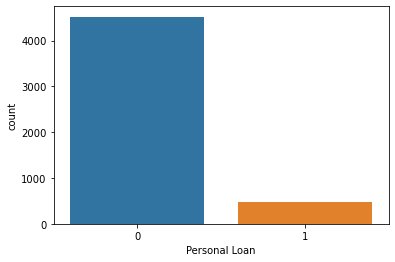

In [8]:
sns.countplot(x ='Personal Loan', data = df1)

Observation :

More than 4000 customers didn't apply for Personal Loan and Hardly 500 customers applied for Personal Loan

<AxesSubplot:xlabel='Income', ylabel='Personal Loan'>

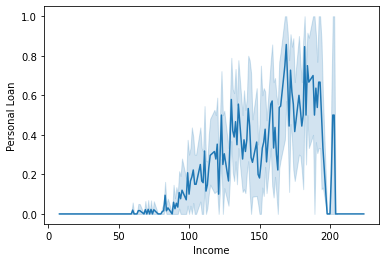

In [9]:
sns.lineplot(data=df1,x="Income",y="Personal Loan")

Observation :
    
This line plot describe that there are high chance to get personal loan when customer's income is between $10000 - $20000

<AxesSubplot:xlabel='Education', ylabel='Personal Loan'>

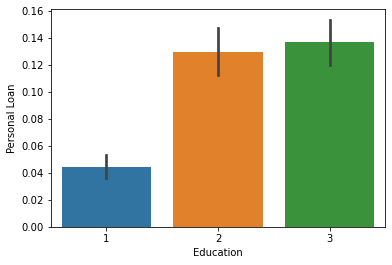

In [10]:
sns.barplot(data=df1,x="Education",y="Personal Loan")

Education Level : 
    1 = Undergrade
    2 = Graduate
    3 = Advanced/Profesional
    
    
Observation :
    
The given barplot describe that there are high chance to get personal loan of that customers who are Graduate or Advanced/Profesional 

<AxesSubplot:xlabel='Personal Loan', ylabel='CCAvg'>

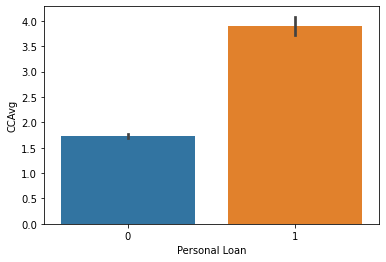

In [11]:
sns.barplot(data=df1,x="Personal Loan",y="CCAvg")

Observation : 
    
The given barplot describe that there are high chance to get personal loan of that customers who are paying more than $2000 on credit card per month

### Train_test_split

In [12]:
df1.columns

Index(['ID', 'Age', 'Experience', 'Income', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

In [13]:
X = df1.drop(columns=['Personal Loan'])
y = df1['Personal Loan']

In [14]:
#Take X as a input column and y as a target column 
X = df1.drop(columns=['Personal Loan'])
y = df1['Personal Loan']

In [15]:
X.columns

Index(['ID', 'Age', 'Experience', 'Income', 'CCAvg', 'Education', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [16]:
X.drop("ID", axis='columns')

,Age,Experience,Income,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,1.6,1,0,1,0,0,0
1,45,19,34,1.5,1,0,1,0,0,0
2,39,15,11,1.0,1,0,0,0,0,0
3,35,9,100,2.7,2,0,0,0,0,0
4,35,8,45,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1.9,3,0,0,0,1,0
4996,30,4,15,0.4,1,85,0,0,1,0
4997,63,39,24,0.3,3,0,0,0,0,0
4998,65,40,49,0.5,2,0,0,0,1,0


In [17]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [18]:
#Shape of X
X.shape

(5000, 11)

In [19]:
#Apply train_test_split on dataframe and take 70% data as a input and 30% data as a output 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [20]:
#Check X_train dataset
X_train

,ID,Age,Experience,Income,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
4430,4431,38,12,24,0.8,3,0,0,0,1,1
4730,4731,52,27,29,1.5,2,159,0,0,0,1
4062,4063,38,14,43,1.7,1,0,0,0,1,0
1016,1017,30,5,69,0.8,2,0,1,0,1,0
4254,4255,51,27,68,1.6,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2922,2923,52,26,49,1.4,3,0,0,0,1,0
23,24,44,18,43,0.7,1,163,1,0,0,0
1667,1668,44,20,22,1.0,1,91,0,0,0,0
895,896,43,17,84,2.6,3,289,1,1,1,1


In [21]:
#Check y_train dataset
y_train

4430    0
4730    0
4062    0
1016    0
4254    0
       ..
2922    0
23      0
1667    0
895     0
3868    0
Name: Personal Loan, Length: 3500, dtype: int64

### Classifications Model

#### Logistic Regression

In [22]:
#Use Logistic Regression model on dataset
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [23]:
#Fit this model on training and testing data
df3 = model.fit(X_train, y_train)

In [24]:
#check X_test data
X_test

,ID,Age,Experience,Income,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
4695,4696,45,19,70,2.8,1,0,0,0,0,1
1263,1264,35,5,85,4.0,3,0,0,0,1,0
2154,2155,32,8,45,2.4,2,0,0,0,0,0
3397,3398,31,6,170,6.7,1,137,0,0,1,0
3781,3782,65,40,118,1.3,1,333,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1442,1443,39,13,71,0.1,1,162,1,0,1,0
408,409,60,36,89,2.8,1,0,0,0,1,0
1441,1442,58,33,43,1.6,3,0,0,0,1,0
3616,3617,41,15,69,1.5,3,78,0,0,1,0


In [25]:
#check prediction value by model on X_test data
y_pred1 = model.predict(X_test)

In [26]:
#check prediction probablity of X_test 
model.predict_proba(X_test)

array([[0.99880593, 0.00119407],
       [0.9689995 , 0.0310005 ],
       [0.99214222, 0.00785778],
       ...,
       [0.97209482, 0.02790518],
       [0.94894274, 0.05105726],
       [0.96829381, 0.03170619]])

In [27]:
#confusion matrix
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred1)

array([[1340,   20],
       [  57,   83]])

In [28]:
#check accuracy score of model
model.score(X_test,y_test)

0.9486666666666667

#### K Nearest Neighbour

In [29]:
#Use KNeighborsClassifier model on dataset
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [30]:
#Fit this model on training and testing data
df4 = knn.fit(X_train, y_train)

In [31]:
#check X_test data
X_test

,ID,Age,Experience,Income,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
4695,4696,45,19,70,2.8,1,0,0,0,0,1
1263,1264,35,5,85,4.0,3,0,0,0,1,0
2154,2155,32,8,45,2.4,2,0,0,0,0,0
3397,3398,31,6,170,6.7,1,137,0,0,1,0
3781,3782,65,40,118,1.3,1,333,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1442,1443,39,13,71,0.1,1,162,1,0,1,0
408,409,60,36,89,2.8,1,0,0,0,1,0
1441,1442,58,33,43,1.6,3,0,0,0,1,0
3616,3617,41,15,69,1.5,3,78,0,0,1,0


In [32]:
#check prediction value by model on X_test data
y_pred2 = knn.predict(X_test)

In [33]:
#check prediction probablity of X_test 
knn.predict_proba(X_test)

array([[1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ]])

In [34]:
#confusion matrix
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred2)

array([[1347,   13],
       [ 134,    6]])

In [35]:
#check accuracy score of model
knn.score(X_test,y_test)

0.902

#### Naïve Bayes

In [36]:
#Use Naïve Bayes model on dataset
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [37]:
#Fit this model on training and testing data
df5 = model.fit(X_train,y_train)

In [38]:
#check X_test data
X_test

,ID,Age,Experience,Income,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
4695,4696,45,19,70,2.8,1,0,0,0,0,1
1263,1264,35,5,85,4.0,3,0,0,0,1,0
2154,2155,32,8,45,2.4,2,0,0,0,0,0
3397,3398,31,6,170,6.7,1,137,0,0,1,0
3781,3782,65,40,118,1.3,1,333,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1442,1443,39,13,71,0.1,1,162,1,0,1,0
408,409,60,36,89,2.8,1,0,0,0,1,0
1441,1442,58,33,43,1.6,3,0,0,0,1,0
3616,3617,41,15,69,1.5,3,78,0,0,1,0


In [39]:
#check prediction value by model on X_test data
y_pred3 = model.predict(X_test)

In [40]:
#check prediction probablity of X_test 
model.predict_proba(X_test)

array([[9.99704381e-01, 2.95619439e-04],
       [9.82818080e-01, 1.71819201e-02],
       [9.99896094e-01, 1.03906335e-04],
       ...,
       [9.99895239e-01, 1.04761097e-04],
       [9.99260496e-01, 7.39503947e-04],
       [9.20615872e-05, 9.99907938e-01]])

In [41]:
y_pred3

array([0, 0, 0, ..., 0, 0, 1])

In [42]:
#coinfusion matrix
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred3)

array([[1240,  120],
       [  62,   78]])

In [43]:
#check accuracy score of model
model.score(X_test,y_test)

0.8786666666666667

### Observation :

### Linear regression may perform best on this dataset because it's accuracy is higher than other models 

#### Accuracy score of linear regression model : 95%
#### Accuracy score of KNN model : 90%
#### Accuracy score of Naive bias model : 91%

In [44]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# Gradio

In [45]:
import gradio as gr
import numpy as np

def classify(num):
    if num == 0:
        return 'Customer may not apply for a personal loan! 🫴🏻'
    else:
        return 'Customer can apply for a personal loan! 🤝🏻'

def personal_loan(text_input, ID,checkbox_input,radio_input, Age, Income, Mortgage, CCAvg, Education, Experience, SecuritiesAccount, CDAccount, Online, CreditCard, file_input):
    
#     input_array = np.array([[text_input,ID,checkbox_input,radio_input, Age, Income, Mortgage, CCAvg, Education, Experience, SecuritiesAccount, CDAccount, Online, CreditCard,file_input]]).astype(np.float32)
#     print("Input array:", input_array)

    input_array2 = np.array([[ID, Age, Income, Mortgage, CCAvg, Education, Experience, SecuritiesAccount, CDAccount, Online, CreditCard]]).astype(np.float32)
 
    pred = df3.predict(input_array2)  
    output = int(pred[0]) 
    
    if output == 'Customer  will not apply for a personal loan! 🫴🏻':
        return [(0)]
    else:
        return [(1)]
    
    print("Prediction : ", classify(num))

text_input = gr.inputs.Textbox(label="Customer Name")
ID = gr.Number(label='ID', info='In numbers only, must be greater than 0 and less than 5001')
checkbox_input = gr.inputs.CheckboxGroup(["Saving Account", "Current Account", "Demat Account"], label="Account Type")
radio_input = gr.inputs.Radio(choices=["Male", "Female","Transgender"])
Age = gr.Number(label='Age', info='In numbers only, must be greater than 22 and less than 68')
Income = gr.Number(label='Income', info='In numbers only, must be greater than 7k and less than 224k')
Mortgage = gr.Number(label='Mortgage', info='In numbers only, must be greater than 0 and less than 635')

CCAvg = gr.inputs.Slider(minimum=0, maximum=10, step=1, default=5, label="CCAvg")
Education = gr.inputs.Slider(minimum=1, maximum=3, step=1, default=2, label="Education")
Experience = gr.inputs.Slider(minimum=-3, maximum=43, step=1, default=10, label="Experience")

SecuritiesAccount = gr.inputs.Dropdown([0, 1], label="SecuritiesAccount")
CDAccount = gr.inputs.Dropdown([0, 1], label="CDAccount")
Online = gr.inputs.Dropdown([0, 1], label="Online")
CreditCard = gr.inputs.Dropdown([0, 1], label="CreditCard")
file_input = gr.inputs.File(label="Upload a File")

iface = gr.Interface(
    fn=personal_loan,
    inputs=[text_input, ID,checkbox_input,radio_input, Age, Income, Mortgage, CCAvg, Education, Experience, SecuritiesAccount, CDAccount, Online, CreditCard, file_input],
    title="Bank_Personal_Loan_Modelling",outputs="text",description="The goal is to predict whether customer will take a personal or not."
)

iface.launch()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [46]:
y_pred = df3.predict([[500,40,40,40,10,3,43,0,0,0,0]])

In [47]:
y_pred

array([1])